<a href="https://colab.research.google.com/github/boscherj/tensorflow/blob/master/Chapitre_3_DNN_for_Supervised_Learning_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df = pd.read_csv("http://bec552ebfe.url-de-test.ws/ml/rossmann-store-sales/train.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
df.shape

(1017209, 9)

In [7]:
store = pd.read_csv("http://bec552ebfe.url-de-test.ws/ml/rossmann-store-sales/store.csv") 
print("Shape of the Dataset:",store.shape)

Shape of the Dataset: (1115, 10)


In [9]:
store.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
df_new = df.merge(store,on=["Store"], how="inner")
print(df_new.shape)

(1017209, 18)


In [11]:
df_new.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [12]:
print("Distinct number of Stores :", len(df_new["Store"].unique()))
print("Distinct number of Days :", len(df_new["Date"].unique()))
print("Average daily sales of all stores : ",round(df_new["Sales"].mean(),2))

Distinct number of Stores : 1115
Distinct number of Days : 942
Average daily sales of all stores :  5773.82


In [13]:
df_new.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [14]:
df_new["DayOfWeek"].value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

In [0]:
# We can extract all date properties from a datetime datatype
import numpy as np
df_new['Date'] = pd.to_datetime(df_new['Date'], infer_datetime_format=True)
df_new["Month"] = df_new["Date"].dt.month
df_new["Quarter"] = df_new["Date"].dt.quarter
df_new["Year"] = df_new["Date"].dt.year
df_new["Day"] = df_new["Date"].dt.day
df_new["Week"] = df_new["Date"].dt.week
df_new["Season"] = np.where(df_new["Month"].isin([3,4,5]),"Spring", np.where(df_new["Month"].isin([6,7,8]),"Summer",np.where(df_new["Month"].isin([9,10,11]),"Fall",np.where(df_new["Month"].isin([12,1,2]),"Winter","None"))))

In [16]:
# Using the head command to view (only) the data and the newly engineered features
print(df_new[["Date","Year","Month","Day","Week","Quarter","Season"]].head())

        Date  Year  Month  Day  Week  Quarter  Season
0 2015-07-31  2015      7   31    31        3  Summer
1 2015-07-30  2015      7   30    31        3  Summer
2 2015-07-29  2015      7   29    31        3  Summer
3 2015-07-28  2015      7   28    31        3  Summer
4 2015-07-27  2015      7   27    31        3  Summer


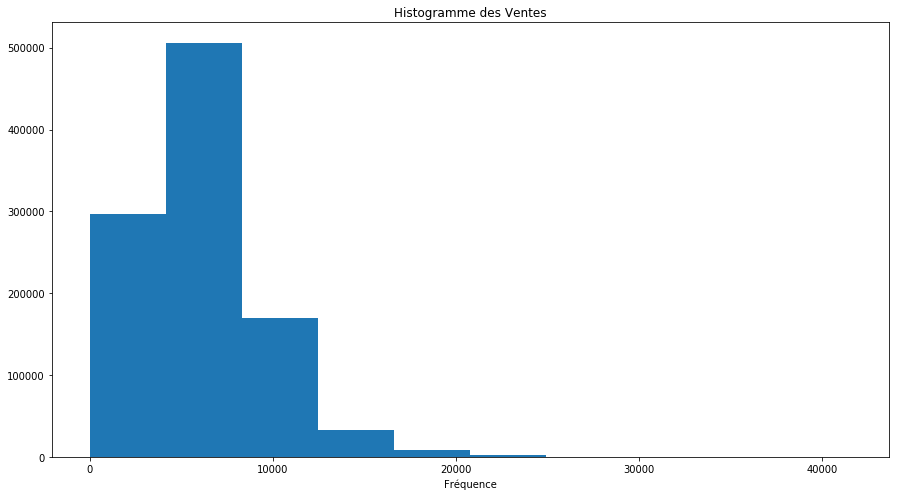

In [20]:
# Import matplotlib, python most popular data visualizing library
import matplotlib.pyplot as plt
%matplotlib inline
# Create a histogram to study the Daily Sales for the stores
plt.figure(figsize=(15,8))
plt.hist(df_new["Sales"])
plt.title("Histogramme des Ventes")
plt.xlabel("bins")
plt.xlabel("Fréquence")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33ce076828>,
      dtype=object)

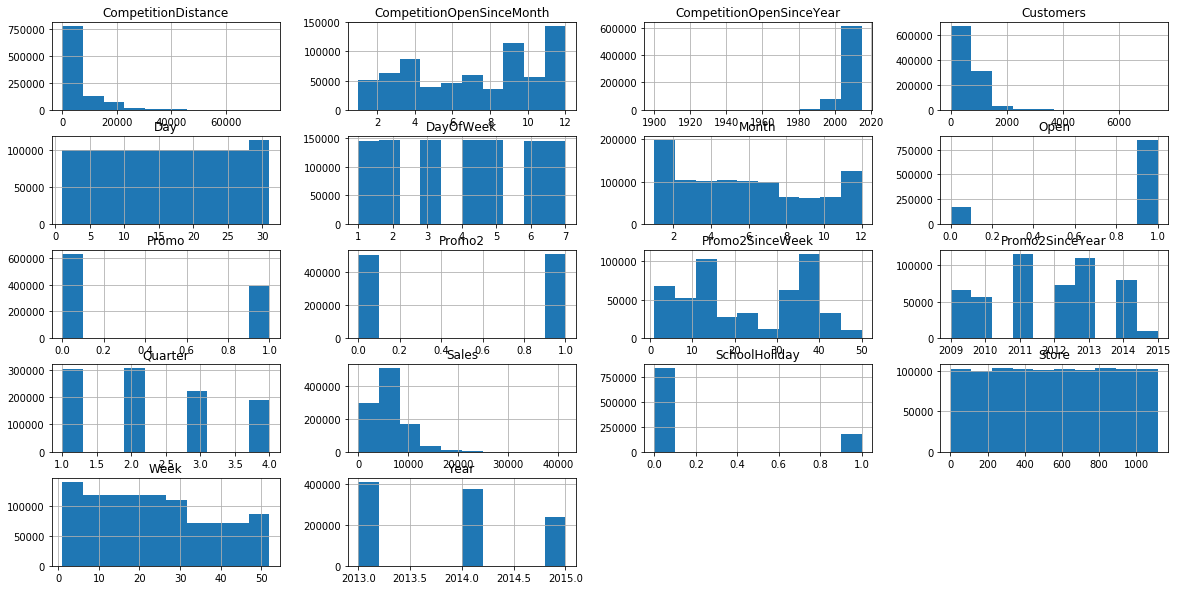

In [21]:
# Use the  histogram function provided by the Pandas object
# The function returns a cross-tab histogram plot for all numeric columns in the data
df_new.hist(figsize=(20,10))

In [22]:
df_new.isnull().sum()/df_new.shape[0] * 100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

In [23]:
# Replace nulls with the mode
df_new["CompetitionDistance"]=df_new["CompetitionDistance"].fillna(df_new["CompetitionDistance"].mode()[0])
# Double check if we still see nulls for the column 
df_new["CompetitionDistance"].isnull().sum()/df_new.shape[0] * 100

0.0

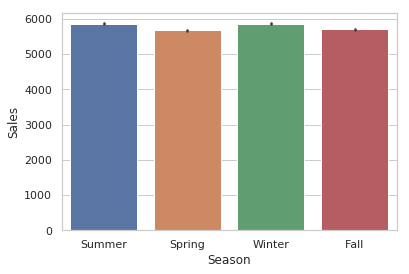

In [24]:
import seaborn as sns  # Seaborn is another powerful visualization library for Python
sns.set(style="whitegrid")
# Create the bar plot for Average Sales across different Seasons
ax = sns.barplot(x="Season", y="Sales", data=df_new)

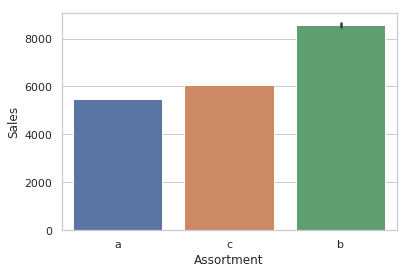

In [25]:
# Create the bar plot for Average Sales across different Assortments
ax = sns.barplot(x="Assortment", y="Sales", data=df_new)

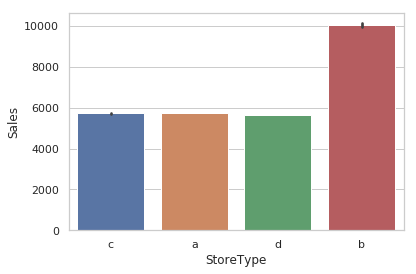

In [26]:
# Create the bar plot for Average Sales across different Store Types
ax = sns.barplot(x="StoreType", y="Sales", data=df_new)

In [27]:
# Define a variable for each type of feature
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

target = ["Sales"]
numeric_columns = ["Customers","Open","Promo","Promo2","StateHoliday","SchoolHoliday","CompetitionDistance"]
categorical_columns = ["DayOfWeek","Quarter","Month","Year", "StoreType","Assortment","Season"]

# Define a function that will intake the raw dataframe and the column name and return a one hot encoded DF
def create_ohe(df, col):
  le = LabelEncoder()
  a=le.fit_transform(df_new[col]).reshape(-1,1)
  ohe = OneHotEncoder(sparse=False)
  column_names = [col+ "_"+ str(i) for i in le.classes_]
  return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))

# Since the above function converts the column, one at a time
# We create a loop to create the final dataset with all features
temp = df_new[numeric_columns]
for column in categorical_columns:
  temp_df = create_ohe(df_new,column)
  temp = pd.concat([temp,temp_df],axis=1)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [29]:
print("Shape of Data:",temp.shape)
print("Distinct Datatypes:",temp.dtypes.unique())

Shape of Data: (1017209, 44)
Distinct Datatypes: [dtype('int64') dtype('O') dtype('float64')]


In [30]:
print(temp.columns[temp.dtypes=="object"])

Index(['StateHoliday'], dtype='object')


In [31]:
temp["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [32]:
temp["StateHoliday"]= np.where(temp["StateHoliday"]== '0',0,1)
# One last check of the data type
temp.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [35]:
from sklearn.model_selection import train_test_split

# Create train and test dataset with an 80:20 split
x_train, x_test, y_train, y_test = train_test_split(temp,
df_new[target],test_size=0.2,random_state=2018)

# Further divide training dataset into train and validation dataset with an 90:10 split
x_train, x_val, y_train, y_val = train_test_split(x_train,
y_train,test_size=0.1,random_state=2018)

# Check the sizes of all newly created datasets
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (732390, 44)
Shape of x_val: (81377, 44)
Shape of x_test: (203442, 44)
Shape of y_train: (732390, 1)
Shape of y_val: (81377, 1)
Shape of y_test: (203442, 1)


In [36]:
# calculate the average score of the train dataset
mean_sales = y_train.mean()
print("Average Sales :",mean_sales)

Average Sales : Sales    5773.099997
dtype: float64


In [37]:
# Calculate the Mean Absolute Error on the test dataset
print("MAE for Test Data:",abs(y_test - mean_sales).mean()[0])

MAE for Test Data: 2883.587604303215


In [38]:
# Create Deep Neural Network Architecture
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))

# The input_dim =44, since the width of the training data=44(refer data engg section)
model.add(Dense(1,activation = "linear"))

#Configure the model
model.compile(optimizer='adam',loss="mean_absolute_error", metrics=["mean_absolute_error"])

#Train the model
model.fit(x_train.values,y_train.values, validation_data=(x_val,y_val),epochs=10,batch_size=64)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 732390 samples, validate on 81377 samples
Epoch 1/10
732390/732390 [==============================] - 30s 41us/step - loss: 944.6557 - mean_absolute_error: 944.6557 - val_loss: 819.7478 - val_mean_absolute_error: 819.7478
Epoch 2/10
732390/732390 [==============================] - 29s 39us/step - loss: 773.2035 - mean_absolute_error: 773.2035 - val_loss: 747.8291 - val_mean_absolute_error: 747.8291
Epoch 3/10
732390/732390 [==============================] - 28s 38us/step - loss: 734.3570 - mean_absolute_error: 734.3570 - val_loss: 723.2145 - val_mean_absolute_error: 723.2145
Epoch 4/10
732390/732390 [==============================] - 27s 37us/step - loss: 718.6157 - mean_absolute_error: 718.6157 - val_loss: 710.5568 - val_mean_absolute_error: 710.5568
Epoch 5/10
732390/732390 [==============================] - 29s 39us/step - loss: 704.8254 - mean_absolute_er

In [39]:
# Use the model's evaluate method to predict and evaluate the test datasets
result = model.evaluate(x_test.values,y_test.values)

# Print the results
for i in range(len(model.metrics_names)):
  print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

203442/203442 [==============================] - 5s 26us/step
Metric  loss : 690.1
Metric  mean_absolute_error : 690.1


In [40]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

history = model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=10,batch_size=64)

# result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
  print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Train on 732390 samples, validate on 81377 samples
Epoch 1/10
732390/732390 [==============================] - 35s 48us/step - loss: 1726005.7325 - mean_absolute_error: 853.7699 - val_loss: 1116257.5049 - val_mean_absolute_error: 710.3434
Epoch 2/10
732390/732390 [==============================] - 36s 49us/step - loss: 1149926.0055 - mean_absolute_error: 718.6125 - val_loss: 1043340.8199 - val_mean_absolute_error: 682.8135
Epoch 3/10
732390/732390 [==============================] - 35s 48us/step - loss: 1078362.3809 - mean_absolute_error: 696.9257 - val_loss: 1030583.2103 - val_mean_absolute_error: 684.6889
Epoch 4/10
732390/732390 [==============================] - 35s 48us/step - loss: 1045838.6690 - mean_absolute_error: 686.2809 - val_loss: 995751.8180 - val_mean_absolute_error: 669.2394
Epoch 5/10
732390/732390 [==============================] - 38s 52us/step - loss: 1027480.0447 - mean_absolute_error: 680.0208 - val_loss: 977277.6982 - val_mean_absolute_error: 667.7428
Epoch 6/10


In [41]:
model = Sequential()
model.add(Dense(350,input_dim = 44,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=15,batch_size=64,callbacks=[history])

result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
  print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Train on 732390 samples, validate on 81377 samples
Epoch 1/15
732390/732390 [==============================] - 43s 58us/step - loss: 1668036.1558 - mean_absolute_error: 848.7682 - val_loss: 1391763.4342 - val_mean_absolute_error: 822.2929
Epoch 2/15
732390/732390 [==============================] - 43s 59us/step - loss: 1178223.9480 - mean_absolute_error: 727.8970 - val_loss: 1326927.5146 - val_mean_absolute_error: 767.8719
Epoch 3/15
732390/732390 [==============================] - 42s 57us/step - loss: 1103083.9624 - mean_absolute_error: 702.5887 - val_loss: 1103129.3224 - val_mean_absolute_error: 708.5258
Epoch 4/15
732390/732390 [==============================] - 43s 59us/step - loss: 1060283.2808 - mean_absolute_error: 688.9944 - val_loss: 1014199.5701 - val_mean_absolute_error: 679.0442
Epoch 5/15
732390/732390 [==============================] - 41s 56us/step - loss: 1038514.9163 - mean_absolute_error: 682.2779 - val_loss: 1043350.7875 - val_mean_absolute_error: 693.5402
Epoch 6/1